#Очистка данных

##Введение

Очистка данных (data cleaning) — это процесс обнаружения и удаления (или исправления) повреждённых, ложных или неинформативных записей таблицы или целой базы данных. Процесс состоит из двух этапов: поиск и ликвидация (или редактирование).

Цель очистки данных — избавиться от «мусора», который может помешать моделированию или исказить его результаты. Во многих задачах очистка данных — это самая главная часть этапа подготовки данных к построению модели, которая нередко занимает большую часть времени работы над задачей.

Сложность очистки и, соответственно, время, затраченное на неё, зависят от сложности задачи и размера данных. Чем больше у вас источников данных, тем больше вероятность того, что необходимо будет проводить тщательную очистку. 

Время, которое специалист тратит на очистку, довольно индивидуально и зависит ещё и от его навыков. В среднем при работе с данными оно занимает около 40-60 % от общего времени работы с данными (включая построение модели).

Нередко оказывается так, что начинающие специалисты пропускают этот этап, сразу переходя к построению своей глубочайшей нейронной сети с невероятно сложной архитектурой и современными наворотами. Однако в результате есть риск столкнуться либо с ошибкой выполнения кода, либо переобученной под «мусор» моделью, предсказания которой мало сопоставимы с действительностью. 

Вспомните поговорку: «мусор на входе — мусор на выходе».

##Знакомство с новыми данными: данные о квартирах от Сбера

В этом модуле мы с вами будем работать с данными с самого настоящего соревнования на платформе Kaggle, инициатором которого стал Сбер. Соревнование проводилось в 2017 году, его призовой фонд составил 25 000 $. Требования Сбера состояли в построении модели, которая бы прогнозировала цены на жильё в Москве, опираясь на параметры самого жилья, а также состояние экономики и финансового сектора в стране.

Датасет представляет собой набор данных из таблицы с информацией о параметрах жилья (train.csv). В ней содержатся 292 признака о состоянии экономики России на момент продажи недвижимости (macro.csv). 

Для упрощения техники очистки данных мы будем отрабатывать на урезанном датасете.

Скачать набор данных в формате csv (разделитель — ',') можно здесь (csv-файл находится в zip-архиве — распакуйте архив, прежде чем продолжать работу!)

Он содержит информацию о 61 признаке. Их значение мы будем объяснять в процессе работы с данными.

Импортируем библиотеки, которые нам понадобятся (pandas для работы с данными, numpy для математических преобразований, matplotlib и seaborn для визуализации):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем наши данные и выведем первые пять строк таблицы с помощью head(), чтобы убедиться в том, что всё подгрузилось верно:

In [2]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


Дополнительно посмотрим на последние пять строк таблицы с помощью tail():

In [4]:
display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


Задание 2.1
Чему равно число строк в таблице?

In [20]:
sber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

Задание 2.2
Сколько районов Москвы и Московской области представлено в данных?

In [14]:
sber_data.describe(include=['object'])

,sub_area,oil_chemistry_raion,railroad_terminal_raion,nuclear_reactor_raion,big_road1_1line,ecology
count,30471,30471,30471,30471,30471,30471
unique,146,2,2,2,2,5
top,Poselenie Sosenskoe,no,no,no,no,poor
freq,1776,30175,29335,29608,29690,8018


Задание 2.3
Чему равна максимальная цена квартир (price_doc)? Введите это число полностью, без округлений.

In [15]:
sber_data['price_doc'].max()

111111112

In [ ]:
Задание 2.4
Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?

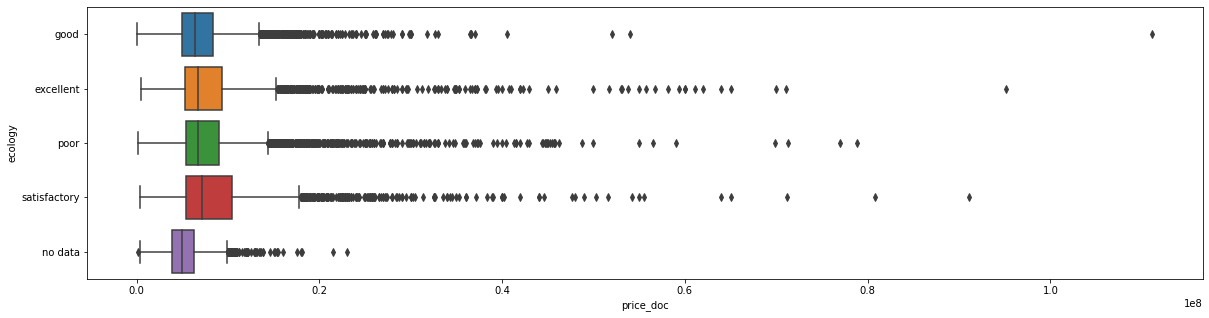

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(20, 5))
boxplot = sns.boxplot(data=sber_data, x='price_doc', y='ecology')


Задание 2.5
Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до центра Москвы (kremlin_km). Выберите все верные утверждения.

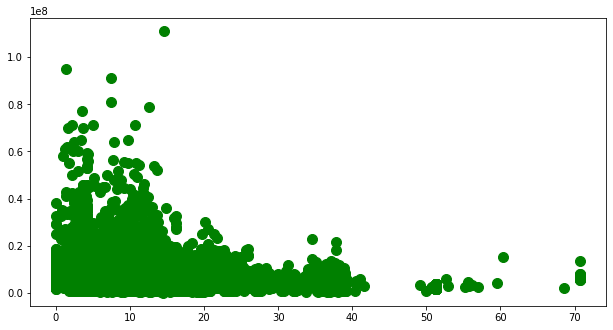

In [24]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=sber_data['kremlin_km'], 
    y=sber_data['price_doc'], 
    s=100,
    marker='o',
    c = 'green'
);

##Работа с пропусками: как их обнаружить?

 Добавить страницу в мои закладки
Работа с отсутствующими записями в таблице, пожалуй, одна из самых сложных и неоднозначных. Она же — самая распространённая для реальных данных. С неё мы и начнём!

В pandas пропуски обозначаются специальным символом NaN (Not-a-Number — «не число»). 

Мы с вами уже сталкивались с пропусками, как только начали работать с настоящими данными. Вспомните датасеты о домах в Мельбурне и коронавирусе. 

?
Чем так плохи пропуски, почему так важно их предобработать?

Ответ очень прост: преобладающее большинство моделей машинного обучения не умеют обрабатывать пропуски, так как они работают только с числами. Если в данных содержится пустая ячейка таблицы, модель выдаст ошибку. 

ПРИЧИНЫ ПОЯВЛЕНИЯ ПРОПУСКОВ В ДАННЫХ

Ошибка ввода данных. Как правило, такая ошибка обусловлена человеческим фактором: никто не застрахован от случайного пропуска графы при заполнении данных.
Ошибка передачи данных. Эта причина на сегодняшний момент возникает довольно редко: с появлением протоколов проверки выгружаемой информации потерять данные при передаче их по сети становится сложнее, но вероятность такого события ненулевая.
Намеренное сокрытие информации. Одна из самых распространённых причин, особенно в социологических опросах. Дело в том, что пользователи/опрашиваемые/клиенты часто скрывают информацию о себе. Например, люди, занимающие высокие должности, могут быть связаны контрактом о неразглашении своих доходов. 
Прямое отсутствие информации. Эта причина очень распространена в данных для рекомендательных систем. Представьте, что у нас есть таблицы фильмов и пользователей, которые просматривают их и ставят им оценки. Мы объединяем всю информацию в одну большую сводную таблицу: например, по строкам идут пользователи, а по столбцам — фильмы. Но вот незадача: у нас нет информации о рейтингах фильмов, которые пользователь ещё не посмотрел. В таком случае на пересечении строки с именем пользователя и столбца с названием фильма, который он ещё не смотрел, ставится пропуск. Главное несчастье состоит в том, что 99 % процентов такой таблицы — это сплошной пропуск.
Мошенничество. Очень острая проблема в финансовой сфере, особенно в банковских данных. Мошенники нередко указывают ложную информацию или не указывают её вовсе.
КАК ОБНАРУЖИТЬ ПРОПУСКИ?

Ранее мы определяли наличие пропусков в данных с помощью метода info(). Но этот метод не позволяет точно локализовать места пропущенных значений, он выводит только число непустых значений и предназначен для определения факта наличия пропусков:

In [25]:
sber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

Найти пропуски зачастую довольно просто за исключением тех случаев, когда пропуски скрыты.

В библиотеке pandas специально для этого реализован метод isnull(). Этот метод возвращает новый DataFrame, в ячейках которого стоят булевы значения True и False. True ставится на месте, где ранее находилось значение NaN.

Посмотрим на результат работы метода на нашей таблице:

In [26]:
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Из таблицы можно увидеть, где были пропущены значения: ячейки со значением True; ячейки, где стоит False, были изначально заполнены.

✍️ Как вы сами понимаете, результат метода isnull() — это, мягко говоря, не самый удобный метод поиска пропусков, однако он является промежуточным этапом других способов, которые мы рассмотрим далее.

##СПИСОК СТОЛБЦОВ С ПРОПУСКАМИ

Первый способ — это вывести на экран названия столбцов, где число пропусков больше 0. 

Для этого вычислим средний по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце.

Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:

In [28]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_null_percent

id                    0.000000
full_sq               0.000000
life_sq              20.947786
floor                 0.548062
sub_area              0.000000
                       ...    
theater_km            0.000000
museum_km             0.000000
ecology               0.000000
mosque_count_1000     0.000000
price_doc             0.000000
Length: 61, dtype: float64

In [29]:
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

Итак, можно увидеть, что у нас большое число пропусков (более 47 %) в столбце hospital_beds_raion (количество больничных коек в округе). 

Далее у нас идут столбцы с числом пропусков чуть больше 20 %: 

preschool_quota (число мест в детском саду в районе);
school_quota (число мест в школах в районе);
life_sq (жилая площадь здания в квадратных метрах). 
Менее одного процента пропусков содержат признаки:

floor (число этажей в доме);
metro_min_walk (время от дома до ближайшего метро пешком в минутах);
metro_km_walk (расстояние до ближайшего метро в километрах);
railroad_station_walk_km (расстояние до ближайшей ж. д. станции в километрах);
railroad_station_walk_min (время до ближайшей ж. д. станции пешком в минутах). 

Эти соотношения дают базовое понимание, какие дальнейшие преобразования со столбцами предстоит производить. Например, уже сейчас ясно, что столбец, в котором почти половина данных пропущена, не может дать нам полезной информации при прогнозировании. Если мы попытаемся его как-то исправить, мы можем только навредить и «нафантазировать» лишнего, поэтому от него, возможно, стоит избавиться. А вот столбцы с менее 1 % пропусков легко можно скорректировать: заполнить отсутствующие значения какими-то числами.

##СТОЛБЧАТАЯ ДИАГРАММА ПРОПУСКОВ

Иногда столбцов с пропусками становится слишком много и прочитать информацию о них из списка признаков с цифрами становится слишком затруднительно — цифры начинают сливаться воедино. 

Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к числу записей. Самый быстрый способ построить её — использовать метод plot():

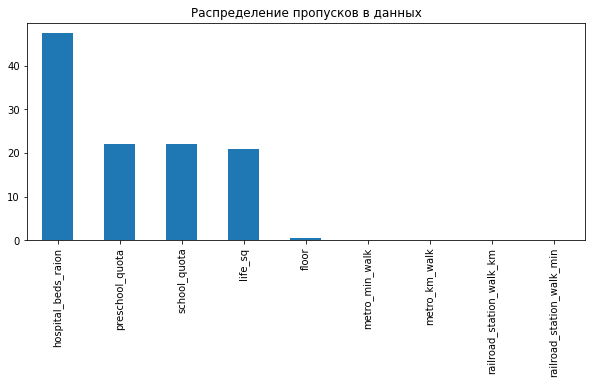

In [30]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

На диаграмме мы видим те же соотношения, что и раньше, но представленные в удобном для визуального восприятия формате. Из неё отчётливо видно, что число пропусков в столбце hospital_beds_raion превышает 45 %. Также мы видим признаки с числом пропусков близ 0.

##ТЕПЛОВАЯ КАРТА ПРОПУСКОВ 

Ещё один распространённый способ визуализации пропусков — тепловая карта. 

Её часто используют, когда столбцов с пропусками не так много (меньше 10). Она позволяет понять не только соотношение пропусков в данных, но и их характерное местоположение в таблице. 

Для создания такой тепловой карты можно воспользоваться результатом метода isnull(). Ячейки таблицы, в которых есть пропуск, будем отмечать жёлтым цветом, а остальные — синим. Для этого создадим собственную палитру цветов тепловой карты с помощью метода color_pallete() из библиотеки seaborn.

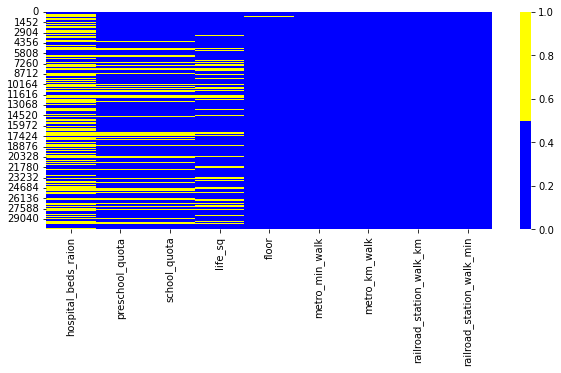

In [31]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

На полученной тепловой карте мы не видим чётких процентных соотношений для числа пропусков в данных, однако мы можем увидеть места их концентрации в таблице. Например, видно, что признаки preschool_quota и school_quota очень сильно связаны друг с другом по части пропусков: во всех записях, где хотя бы один не определён, не указан и второй (жёлтые линии для двух этих признаков полностью совпадают друг с другом).

#Работа с пропусками: методы обработки

#МЕТОДЫ ОБРАБОТКИ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ

Наибольшая сложность в очистке данных от пропусков заключается в выборе метода их обработки. Все методы, которые мы рассмотрим, по сути являются простыми эвристиками, без математического обоснования. 

Не существует общего решения проблемы с отсутствующими данными. Для каждого конкретного случая приходится подбирать наиболее подходящие методы или их комбинации. При этом каждая модель уникальна и часто предполагает случайность, поэтому невозможно предсказать заранее, какая комбинация методов сработает на ваших данных лучше всего.

Однако не стоит расстраиваться! Мы рассмотрим главные рекомендации по методам, которые позволят вам работать с пропусками, как минимум, не испортив ваши данные.

##ОТБРАСЫВАНИЕ ЗАПИСЕЙ И ПРИЗНАКОВ

Первая техника — самая простая из всех. Она предполагает простое удаление записей или признаков, в которых содержатся пропуски. 

Здесь важно правильно выбрать ось удаления: если мы избавимся от большого числа строк, то рискуем потерять важные данные, а если мы удалим столбцы, то можем потерять важные признаки.

Прежде всего порассуждаем логически: в столбце hospital_beds_raion более 47 % пропусков. Если мы будем удалять все строки, в которых этот признак пропущен, мы потеряем почти половину наших данных! 

Правильнее будет просто удалить столбец, ведь число мест в районных больницах — это не самый информативный признак для определения цены квартиры.

А вот если мы удалим весь столбец metro_km_walk, где менее 1 % пропусков, то потеряем полезный признак при формировании прогноза цены, ведь расстояние до ближайшего метро — это важный фактор при выборе квартиры. В данном случае лучше будет удалить сами записи.

>Специалисты рекомендуют при использовании метода удаления придерживаться следующих правил: удаляйте столбец, если число пропусков в нем более 30-40 %. В остальных случаях лучше удалять записи.

Для удаления строк и столбцов будем использовать метод dropna(), который позволяет удалять пропуски с тонким подходом к настройке. 

Основные параметры метода:

*axis — ось, по которой производится удаление (по умолчанию 0 — строки).  
*how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; all — если во всех столбцах есть пропуски).   
*thresh — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется.    Например, если мы установим thresh в значение 2, то мы удалим строки, где число пропусков  и более, где  — число признаков.

Предварительно создадим копию исходной таблицы — drop_data, чтобы не повредить её. Зададимся порогом в 70 %: будем оставлять только те столбцы, в которых 70 и более процентов записей не являются пустыми . После этого удалим записи, в которых содержится хотя бы один пропуск. Наконец, выведем информацию о числе пропусков и наслаждаемся нулями.

In [35]:
#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

Посмотрим на результирующее число записей:



In [36]:
print(drop_data.shape)

(20888, 60)


Итак, мы удалили один столбец и ⅓ всех записей для того, чтобы избавиться от пропусков. Не слишком ли это много и что с этим можно сделать?

##ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ

Чтобы дырявая бочка не протекала, вставьте в дырку пробку. С этой мыслью связан другой способ бороться с пропусками — заполнение константами. 

Чаще всего пустые места заполняют средним/медианой/модой для числовых признаков и модальным значением для категориальных признаков. 

Вся сложность заключается в выборе метода заполнения. Важным фактором при выборе метода является распределение признаков с пропусками. Давайте выведем их на экран. 

В pandas это можно сделать с помощью метода hist():

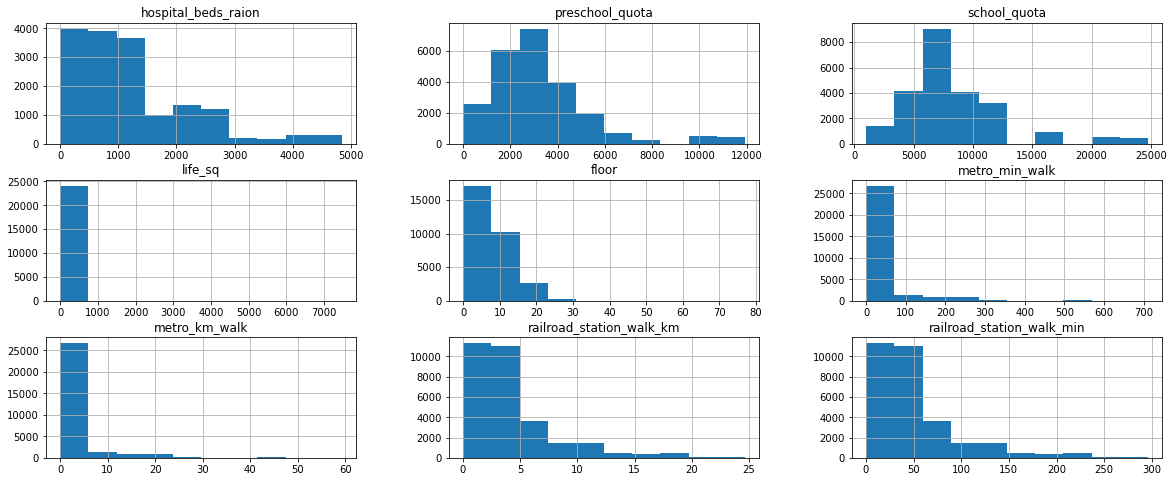

In [39]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

Итак, рассмотрим несколько рекомендаций.

Для распределений, похожих на логнормальное, где пик близ нуля, а далее наблюдается постепенный спад частоты, высока вероятность наличия выбросов (о них мы поговорим чуть позже). Математически доказывается, что среднее очень чувствительно к выбросам, а вот медиана — нет. Поэтому предпочтительнее использовать медианное значение для таких признаков.  
Если признак числовой и дискретный (например, число этажей, школьная квота), то их заполнение средним/медианой является ошибочным, так как может получиться число, которое не может являться значением этого признака. Например, количество этажей — целочисленный признак, а расчёт среднего может дать 2.871. Поэтому такой признак заполняют либо модой, либо округляют до целого числа (или нужного количества знаков после запятой) среднее/медиану.  
Категориальные признаки заполняются либо модальным значением, либо, если вы хотите оставить информацию о пропуске в данных, значением 'unknown'. На наше счастье, пропусков в категориях у нас нет.
Иногда в данных бывает такой признак, основываясь на котором, можно заполнить пропуски в другом. Например, в наших данных есть признак full_sq (общая площадь квартиры). Давайте исходить из предположения, что, если жилая площадь (life_sq) неизвестна, то она будет равна суммарной площади!

Заполнение значений осуществляется с помощью метода fillna(). Главный параметр метода — value (значение, на которое происходит заполнение данных в столбце). Если метод вызывается от имени всего DataFrame, то в качестве value можно использовать словарь, где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы. 

Создадим такой словарь, соблюдая рекомендации, приведённые выше, а также копию исходной таблицы. Произведём операцию заполнения с помощью метода fillna() и удостоверимся, что пропусков в данных больше нет:

In [40]:
#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

Посмотрим, на то, как изменились распределения наших признаков:

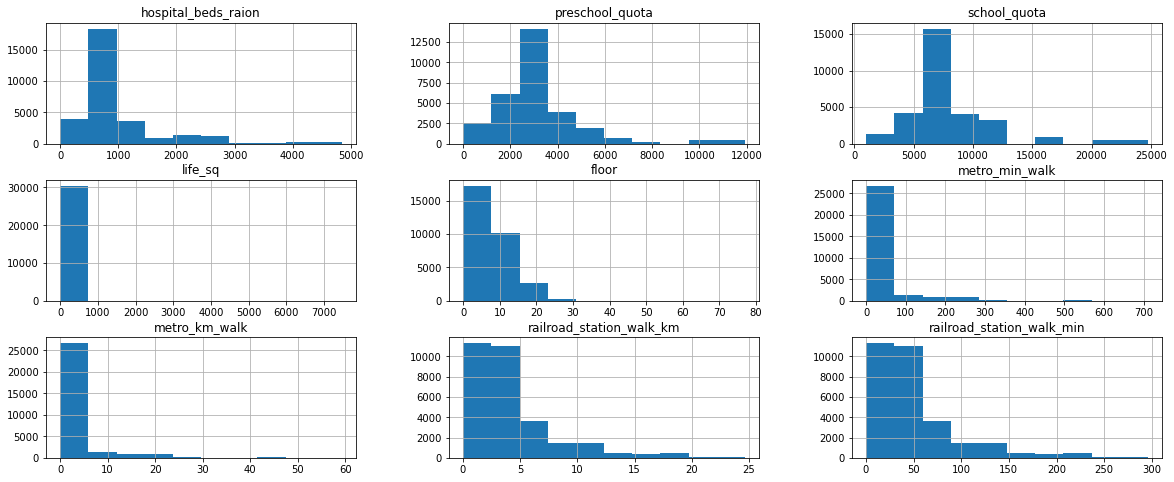

In [41]:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

>Обратите внимание на то, как сильно изменилось распределение для признака hospital_beds_raion. Это связано с тем, что мы заполнили модальным значением почти 47 % общих данных. В результате мы кардинально исказили исходное распределение признака, что может плохо сказаться на модели.

Недостаток метода заполнения константой состоит в том, что мы можем «нафантазировать» новые данные, которые не учитывают истинного распределения.

##ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ С ДОБАВЛЕНИЕМ ИНДИКАТОРА

Если мы используем заполнение пропусков константами, может быть, имеет смысл сказать модели о том, что на этом месте был пропуск? 

Давайте добавим к нашим данным признаки-индикаторы, которые будут сигнализировать о том, что в столбце на определённом месте в таблице был пропуск. Это место в столбце-индикаторе будем помечать как True. 

Эта эвристика пытается снизить влияние искажения признака, указав модели на места, где мы «нафантазировали» данные.

Посмотрим на реализацию. Как обычно, создадим копию indicator_data исходной таблицы. В цикле пройдёмся по столбцам с пропусками и будем добавлять в таблицу новый признак (с припиской "was_null"), который получается из исходного с помощью применения метода isnull(). После чего произведём обычное заполнение пропусков, которое мы совершали ранее, и выведем на экран число отсутствующих значений в столбце, чтобы убедиться в результате:

In [42]:
#создаем копию исходной таблицы
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

Чтобы убедиться в добавлении признаков-индикаторов, выведем первые пять строк таблицы:

In [43]:
indicator_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,price_doc,hospital_beds_raion_was_null,preschool_quota_was_null,school_quota_was_null,life_sq_was_null,floor_was_null,metro_min_walk_was_null,metro_km_walk_was_null,railroad_station_walk_km_was_null,railroad_station_walk_min_was_null
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,5850000,False,False,False,False,False,False,False,False,False
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,6000000,False,False,False,False,False,False,False,False,False
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,5700000,False,False,False,False,False,False,False,False,False
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,13100000,True,False,False,False,False,False,False,False,False
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,16331452,False,False,False,False,False,False,False,False,False


Метод исходит из предположения, что, если дать модели информацию о том, что в ячейке ранее была пустота, то она будет меньше доверять таким записям и меньше учитывать её в процессе обучения. Иногда такие фишки действительно работают, иногда не дают эффекта, а иногда и вовсе могут ухудшить результат обучения и затруднить процесс обучения.

Когда мы добавляем признаки-индикаторы, мы повышаем размерность наших данных. Теперь представьте, что столбцов с пропусками сотня, по паре штук в каждом. 

Не нужно знать высшую математику, чтобы понять, что в таком случае мы увеличим размерность исходной таблицы ещё на сотню и 99 % строк этих столбцов будут заполнены нулями (False). При увеличении размерности в данных время обучения некоторых моделей растет экспоненциально — увеличив число признаков в два раза, вы увеличите время обучения в 7.38 раза! И при этом, возможно, даже не получите прироста в качестве. 

Более того, существует такое понятие, как проклятие размерности. Когда мы с вами будем обучать модели, мы будем искать глобальный минимум некоторой функции потерь. Размерность этой функции определяется числом признаков, на которых мы обучаем алгоритм. 

Проклятие размерности гласит, что, увеличивая размерность функции, мы повышаем сложность поиска этого минимума и рискуем вовсе не найти его! Об этом страшном проклятии мы ещё будем говорить в курсе по ML и даже попробуем его победить. Но об этом чуть позже.

Однако, несмотря на свои недостатки, этот метод кажется наиболее логичным из предложенных ранее и часто используется в очистке данных.

##КОМБИНИРОВАНИЕ МЕТОДОВ

Наверняка вы уже догадались, что необязательно использовать один метод. Вы можете их комбинировать. Например, мы можем:

удалить столбцы, в которых более 30 % пропусков;
удалить записи, в которых более двух пропусков одновременно;
заполнить оставшиеся ячейки константами.
Посмотрим на реализацию такого подхода в коде:

In [44]:
#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(how='any', thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(how='any', thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

Выведем результирующее число строк и столбцов:

In [45]:
print(combine_data.shape)

(26800, 60)


Вы можете придумывать свои собственные комбинации методов и использовать их для борьбы с пропусками, главное — найти баланс между потерей информации и её искажением.

Примечание. Стоит отметить, что предположение о том, что жилая площадь равна общей, слишком тривиально. Порассуждаем логически. Очевидно, что обычно в квартире есть хотя бы санузел, который не учитывается в жилой площади, и тогда жилая площадь будет меньше общей. Если взять соотношение жилой площади к общей площади и построить boxplot в log-масштабе, то медиана будет на около 0.6, а значение 1 (жилая = общая) не войдёт даже в последний квартиль. Поэтому в реальной задаче такая оценка соотношения площадей является не совсем корректной.

##РЕЗЮМЕ ПО МЕТОДАМ РАБОТЫ С ПРОПУСКАМИ

Итак, мы рассмотрели основные методы решения проблемы с недостающей информацией, а также их недостатки. 

Ещё раз хотим подчеркнуть, что выбор метода или комбинации методов является исключительно вашим решением. Однако важно держать в голове несколько рекомендаций:

Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных. Однако если этот признак очень важен для прогнозирования, вам придётся поколдовать над ним, чтобы «заплатки», которыми вы закрываете пропуски, выглядели правдоподобно.
Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.
Если вам позволяют сроки вашего проекта, попробуйте несколько кардинально разных подходов работы с пропусками.

#Выбросы: почему появляются и чем опасны?

Ещё одна типичная проблема для больших данных — это наличие в них выбросов. 

Что такое выброс? На самом деле строгого математического определения нет, но часто используют следующее:

Выброс (аномалия) — это наблюдение, которое существенно выбивается из общего распределения и сильно отличается от других данных.

Как вы сами видите, в этом определении не определены точные границы терминов «существенно» и «сильно». В этом и заключается сложность поиска выбросов: как нащупать ту грань, когда наблюдение можно считать выбросом? Однозначного ответа нет, однако мы рассмотрим некоторые методы, которые могут помочь приблизительно найти её.

![](//SkillFactory/PYTHON-14%20%D0%9E%D1%87%D0%B8%D1%81%D1%82%D0%BA%D0%B0%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/data/dst-3-unit-1-mod-14-17.png/300x200)